In [9]:
import os  
import pandas as pd  
import logging  
from datetime import datetime  
  
# Importa funções criadas nos outros módulos 
import import_ipynb
from Simulate_Portfolio import simulate_portfolio  
from Calculate_Metrics import calculate_metrics  
from Allocate_Waterfall import allocate_waterfall
from Generate_Reports import generate_reports



In [10]:
# Configuração de logs
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    datefmt="%H:%M:%S"
)

In [11]:
# Paramentos do pipeline
N_CONTRACTS = 10_000
SEED = 42
SENIOR_PERC = 0.8

In [12]:
# TimeStamp para organizar Relatorios
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = os.path.join("reports", f"run_{timestamp}")
os.makedirs(output_dir, exist_ok=True)

In [13]:
# 1. Simulação do Portifolio
logging.info("Iniciando Simulação do Portfolio...")
df_portfolio, df_cashflows = simulate_portfolio(n_contracts=N_CONTRACTS, seed=SEED)

# Salvando CSVs
data_dir = "data"
os.makedirs(data_dir, exist_ok=True)
df_portfolio.to_csv(os.path.join(data_dir, "portifolio.csv"), index=False)  
df_cashflows.to_csv(os.path.join(data_dir, "cashflows.csv"), index=False)  
logging.info(f"Arquivos de simulação salvos em {data_dir}")

16:53:21 - INFO - Iniciando Simulação do Portfolio...
16:53:27 - INFO - Arquivos de simulação salvos em data


In [14]:
# 2 - Calculando Metricas
logging.info("Calculando métricas do portfólio...")  
metrics = calculate_metrics(df_portfolio, df_cashflows)  
logging.info(f"Saldo Total: {metrics['saldo_total']:.2f}")  
logging.info(f"Taxa de Inadimplência: {metrics['taxa_inadimplencia']:.2%}")  
logging.info(f"Retorno Esperado (IRR mensal): {metrics['retorno_esperado_IRR']:.4f}")

16:53:27 - INFO - Calculando métricas do portfólio...
16:53:27 - INFO - Saldo Total: 380375223.97
16:53:27 - INFO - Taxa de Inadimplência: 17.87%
16:53:27 - INFO - Retorno Esperado (IRR mensal): nan


In [15]:
# 3. Alocação Waterfall
logging.info("Alocando fluxos no waterfall...")  
waterfall_df = allocate_waterfall(metrics["fluxo_caixa_real"], senior_perc=SENIOR_PERC)  
logging.info("Waterfall concluído.")

16:53:27 - INFO - Alocando fluxos no waterfall...
16:53:27 - INFO - Waterfall concluído.


16:53:27 - INFO - Gerando relatórios (Excel + PDF)...


✅ Excel salvo em: reports\run_20250818_165321\reports.xlsx


16:53:28 - INFO - Relatórios gerados em reports\run_20250818_165321


✅ PDF salvo em: reports\run_20250818_165321\report.pdf


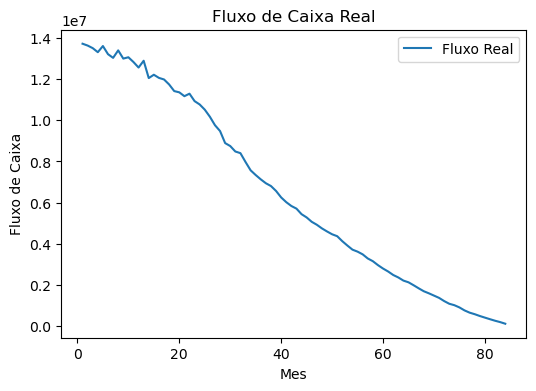

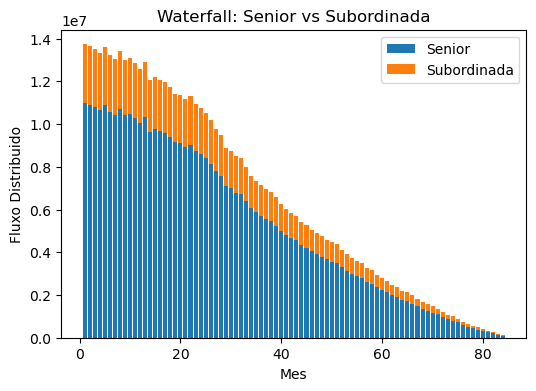

In [16]:
# 4. Relatórios Automáticos
logging.info("Gerando relatórios (Excel + PDF)...")  
generate_reports(metrics, waterfall_df, output_dir=output_dir)  
logging.info(f"Relatórios gerados em {output_dir}")